# Part I - Loan Data from Prosper
### by Ashley Self

## Introduction
This dataset contains over 100,000 loans originating from the credit company Prosper.

## Step I - Data Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the dataset and view first 5 rows
prosper_df = pd.read_csv('prosperLoanData.csv')
prosper_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# looking at each column to narrow down what data I want to explore (suggested to only keep 10-15 columns(or variables))
prosper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

**Note:**
    This dataset contains 81 columns; for my analysis I will only be working with the following columns (variables):

In [4]:
new_variables = ['LoanOriginationDate',
                 'ListingCategory (numeric)',
                 'Term',
                 'BorrowerRate',
                 'MonthlyLoanPayment',
                 'ProsperScore',
                 'LoanStatus',
                 'EstimatedLoss',
                 'EmploymentStatus',
                 'StatedMonthlyIncome',
                 'DebtToIncomeRatio',
                 'DelinquenciesLast7Years',
                 'BorrowerState']

I would have liked to work with the 'credit grade' variable, but there are too many NaN entries that I feel it would skew any information I collect and analyze. The Data Dictionary states: "Applicable for listings pre-2009 period and will only be populated for those listings."

In [5]:
# create new df with only columns listed above, show a sample of 5 to make sure it works
clean_prosper_df = prosper_df[new_variables]
clean_prosper_df.sample(5)

,LoanOriginationDate,ListingCategory (numeric),Term,BorrowerRate,MonthlyLoanPayment,ProsperScore,LoanStatus,EstimatedLoss,EmploymentStatus,StatedMonthlyIncome,DebtToIncomeRatio,DelinquenciesLast7Years,BorrowerState
68733,2013-07-01 00:00:00,2,60,0.1914,299.20,6.0,Current,0.0649,Employed,9250.00,0.28,0.0,UT
20741,2006-08-17 00:00:00,0,36,0.2900,81.73,NaN,Completed,NaN,Not available,5000.00,0.14,6.0,UT
78582,2013-11-13 00:00:00,1,36,0.0869,617.29,11.0,Current,0.0199,Employed,11250.00,0.18,0.0,PA
89533,2014-02-19 00:00:00,1,36,0.2624,404.19,3.0,Current,0.1325,Employed,3500.00,0.56,8.0,MI
7202,2013-02-14 00:00:00,7,12,0.1656,454.98,2.0,Completed,0.0874,Employed,10001.75,0.35,0.0,IL


##### Description of each variable (column) for reference going forward

1. __LoanOriginationDate__ - The date the loan was originated.
2. __ListingCategory (numeric)__ - The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
3. __Term__ - The length of the loan expressed in months.
4. __BorrowerRate__ - The Borrower's interest rate for this loan. 
5. __MonthlyLoanPayment__ - The scheduled monthly loan payment.
6. __ProsperScore__ - A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
7. __LoanStatus__ - The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
8. __EstimatedLoss__ - Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.
9. __EmploymentStatus__ - The employment status of the borrower at the time they posted the listing.
10. __StatedMonthlyIncome__ - The monthly income the borrower stated at the time the listing was created.
11. __DebtToIncomeRatio__ - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
12. __DelinquenciesLast7Years__ - Number of delinquencies in the past 7 years at the time the credit profile was pulled.
13. __BorrowerState__ - The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

In [6]:
# look at the Dtype of each column
clean_prosper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanOriginationDate        113937 non-null  object 
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   Term                       113937 non-null  int64  
 3   BorrowerRate               113937 non-null  float64
 4   MonthlyLoanPayment         113937 non-null  float64
 5   ProsperScore               84853 non-null   float64
 6   LoanStatus                 113937 non-null  object 
 7   EstimatedLoss              84853 non-null   float64
 8   EmploymentStatus           111682 non-null  object 
 9   StatedMonthlyIncome        113937 non-null  float64
 10  DebtToIncomeRatio          105383 non-null  float64
 11  DelinquenciesLast7Years    112947 non-null  float64
 12  BorrowerState              108422 non-null  object 
dtypes: float64(7), int64(2), obje

In [7]:
# convert LoanOriginationDate column to datetime Dtype
clean_prosper_df['LoanOriginationDate'] = pd.to_datetime(clean_prosper_df['LoanOriginationDate'])

C:\Users\amtid\AppData\Local\Temp\ipykernel_13324\3614405754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_prosper_df['LoanOriginationDate'] = pd.to_datetime(clean_prosper_df['LoanOriginationDate'])


In [8]:
# make sure it changed the Dtype of LoanOriginationDate column to datetime
clean_prosper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   LoanOriginationDate        113937 non-null  datetime64[ns]
 1   ListingCategory (numeric)  113937 non-null  int64         
 2   Term                       113937 non-null  int64         
 3   BorrowerRate               113937 non-null  float64       
 4   MonthlyLoanPayment         113937 non-null  float64       
 5   ProsperScore               84853 non-null   float64       
 6   LoanStatus                 113937 non-null  object        
 7   EstimatedLoss              84853 non-null   float64       
 8   EmploymentStatus           111682 non-null  object        
 9   StatedMonthlyIncome        113937 non-null  float64       
 10  DebtToIncomeRatio          105383 non-null  float64       
 11  DelinquenciesLast7Years    112947 non-null  float64 

Prosper has used their own rating system (ProsperScore) since July 2009: because of this, we have quite a bit of missing values (shown as NaN) in that column due to some loans originating before this date.

In [9]:
# drop all rows with NaN values (regardless of column(s)) as this would skew our data
clean_prosper_df = clean_prosper_df.dropna(how='any')

In [10]:
# show all Nan's have been dropped successfully
clean_prosper_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77557 entries, 1 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   LoanOriginationDate        77557 non-null  datetime64[ns]
 1   ListingCategory (numeric)  77557 non-null  int64         
 2   Term                       77557 non-null  int64         
 3   BorrowerRate               77557 non-null  float64       
 4   MonthlyLoanPayment         77557 non-null  float64       
 5   ProsperScore               77557 non-null  float64       
 6   LoanStatus                 77557 non-null  object        
 7   EstimatedLoss              77557 non-null  float64       
 8   EmploymentStatus           77557 non-null  object        
 9   StatedMonthlyIncome        77557 non-null  float64       
 10  DebtToIncomeRatio          77557 non-null  float64       
 11  DelinquenciesLast7Years    77557 non-null  float64       
 12  Bor

Cleaning up all NaN values has left us with the 13 columns that I reduced the df down to, but only 77,557 loans - this is more than enough loan data to do exploratory analysis.

In [11]:
# looking at the descriptive statistics of the new df
clean_prosper_df.describe()

,ListingCategory (numeric),Term,BorrowerRate,MonthlyLoanPayment,ProsperScore,EstimatedLoss,StatedMonthlyIncome,DebtToIncomeRatio,DelinquenciesLast7Years
count,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000
mean,3.284771,42.724035,0.193411,295.754619,6.061967,0.078596,5963.503215,0.258752,3.752595
std,4.385368,11.711915,0.073899,189.327595,2.362354,0.045938,5082.144391,0.318326,9.464378
min,0.000000,12.000000,0.040000,0.000000,1.000000,0.004900,0.250000,0.000000,0.000000
25%,1.000000,36.000000,0.134900,158.490000,4.000000,0.042400,3533.333333,0.150000,0.000000
50%,1.000000,36.000000,0.184500,256.390000,6.000000,0.069900,5000.000000,0.220000,0.000000
75%,3.000000,60.000000,0.252400,392.280000,8.000000,0.108000,7166.666667,0.320000,2.000000
max,20.000000,60.000000,0.360000,2251.510000,11.000000,0.366000,483333.333333,10.010000,99.000000


### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in my cleaned dataset is whether or not we can predict how likely a consumer is to default on a line of credit with the variables selected.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe that the BorrowerRate, MonthlyLoanPayment, EmploymentStatus, and DebtToIncomeRatio will show the strongest correlation to whether or not that consumer defaulted on their line of credit. The Term and StatedMonthlyIncome will be explored as well to see if these variables contribute to a high risk score (or ProsperScore) and LoanStatus, too.

In [12]:
# set the color for all plots going forward
plot_color = sb.color_palette()[0]

## Step II - Univariate Exploration

#### 1 - Listing Category Visualization

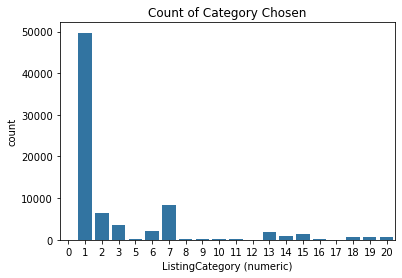

In [13]:
# which loan category did consumers choose the most?
sb.countplot(data = clean_prosper_df, x = 'ListingCategory (numeric)', color = plot_color).set(title='Count of Category Chosen');
# plot ordered by numeric category

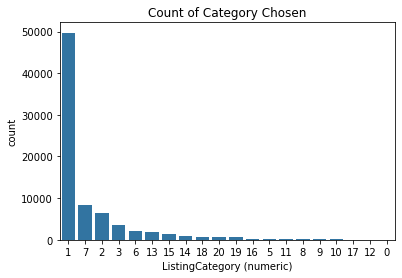

In [14]:
# order the plot by most common to least common choice (desc)
sb.countplot(data = clean_prosper_df, x = 'ListingCategory (numeric)', color = plot_color, order = clean_prosper_df['ListingCategory (numeric)'].value_counts().index).set(title='Count of Category Chosen');

#### Observation(s):

 - The majority of borrowers selected "Debt Consolidation" (Category 1) as their reasoning behind applying for a Prosper loan.
 - The second highest reason borrowers chose when applying for a loan was "Other" (Category 7).
 - Categories 0 (Not Available), 12 (Green Loans), and 17 (RV) do not seem to be selected at all according to these charts.

#### 2 - Stated Monthly Income Visualization

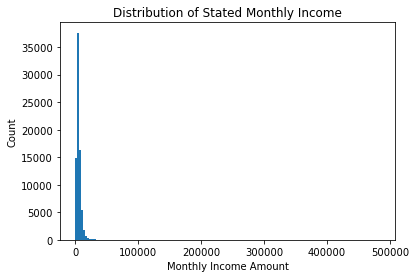

In [15]:
# plot monthly income reported by consumer through a histogram with bins
plt.hist(data=clean_prosper_df, x='StatedMonthlyIncome', bins=150)
plt.title("Distribution of Stated Monthly Income")
plt.xlabel('Monthly Income Amount')
plt.ylabel('Count');
# what is the most common income reported?

**Note:**
    The distribution of StatedMonthlyIncome is heavily right-skewed, so we should check how many outliers are present.

In [16]:
# checking for number of outliers (if they exist)
std_inc = clean_prosper_df['StatedMonthlyIncome'].std()
mean_inc = clean_prosper_df['StatedMonthlyIncome'].mean()
boundary = mean_inc + std_inc * 3
len(clean_prosper_df[clean_prosper_df['StatedMonthlyIncome'] >= boundary])

608

According to the code above, there are **608 outliers** attached to the variable StatedMonthlyIncome.

**Zooming the graph in to get a more clear picture**

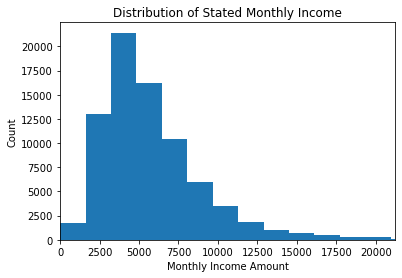

In [17]:
# plot monthly income reported by consumer through a histogram with different bin size, minus outliers
plt.hist(data=clean_prosper_df, x='StatedMonthlyIncome', bins=300)
plt.title("Distribution of Stated Monthly Income")
plt.xlabel('Monthly Income Amount')
plt.ylabel('Count')
plt.xlim(0, boundary);

In [19]:
# looking at the descriptive statistics of just the StatedMonthlyIncome column to compare to the last two visuals
clean_prosper_df['StatedMonthlyIncome'].describe()

count     77557.000000
mean       5963.503215
std        5082.144391
min           0.250000
25%        3533.333333
50%        5000.000000
75%        7166.666667
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

#### Observation(s):

 - With the upper boundary set at the income mean plus the income standard deviation (times 3), the distribution is still right-skewed: however, we can see the data more clearly now and can visibly, confidently, guess that the mode of StatedMonthlyIncome is between **3,750 - 5,000 per month**.

#### 3 - Loan Status Visualization

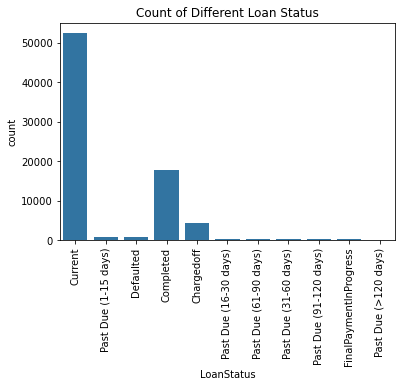

In [20]:
# which loan status has the highest count when the data was pulled?
sb.countplot(data = clean_prosper_df, x = 'LoanStatus', color = plot_color).set(title='Count of Different Loan Status')
plt.xticks(rotation=90);

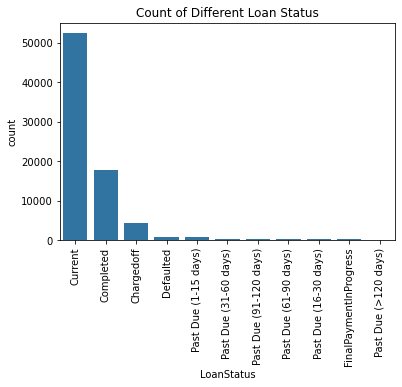

In [21]:
# order the plot by highest count to lowest count (desc)
sb.countplot(data = clean_prosper_df, x = 'LoanStatus', color = plot_color, order = clean_prosper_df['LoanStatus'].value_counts().index).set(title='Count of Different Loan Status')
plt.xticks(rotation=90);

#### Observation(s):

 - Most of the loans in the dataset are actually current (meaning in good standing at the time the data was pulled)!
 - Past Due loans are grouped by how late the consumer is in days (ie: 1-15, 16-30, three groups of 30 days, and payments > 120 days).
 - We can see that the second largest status is completed, but we do not know what the full payment history is, just that the loan is paid off.
 - There are not many "Defaulted" and "Chargedoff" statuses as I expected, which is a good thing for both the consumer and the company.
 - The last status is "Final Payment in Progress", which has very little count compared to the others.

#### 4 - Debt To Income Ratio Visualization

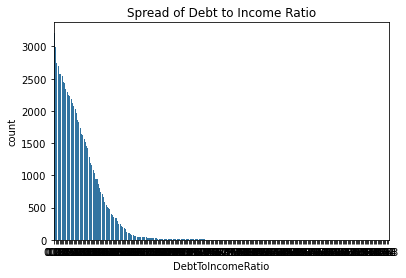

In [22]:
# plotting DTI to view spread of borrowers DTI
sb.countplot(data = clean_prosper_df, x = 'DebtToIncomeRatio', color = plot_color, order = clean_prosper_df['DebtToIncomeRatio'].value_counts().index).set(title='Spread of Debt to Income Ratio');

*I left this visual in as it is not necessarily a dead-end, but I want to make it look cleaner and easier to read (like StatedMonthlyIncome a few lines above).*

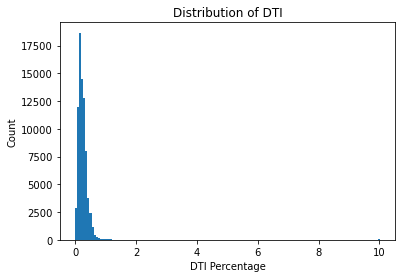

In [23]:
# I want to try and plot DTI with a histogram with bins to see if it visualizes better
plt.hist(data=clean_prosper_df, x='DebtToIncomeRatio', bins=150)
plt.title("Distribution of DTI")
plt.xlabel('DTI Percentage')
plt.ylabel('Count');
# what is the spread of DTI for borrowers?

**Note:**
    Just like StatedMonthlyIncome above, DebtToIncomeRatio is heavily right-skewed, therefor i will check for any outliers present, remove them, and replot with a more clear view.

In [24]:
# checking for number of outliers (if they exist)
std_dti = clean_prosper_df['DebtToIncomeRatio'].std()
mean_dti = clean_prosper_df['DebtToIncomeRatio'].mean()
boundary = mean_dti + std_dti * 3
len(clean_prosper_df[clean_prosper_df['DebtToIncomeRatio'] >= boundary])

213

According to the code above, there are **213 outliers** attached to the variable DebtToIncomeRatio.

**Zooming the graph in to get a more clear picture**

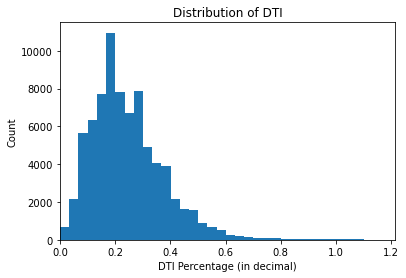

In [25]:
# plot the borrowers DTI through a histogram with different bin size, minus outliers
plt.hist(data=clean_prosper_df, x='DebtToIncomeRatio', bins=300)
plt.title("Distribution of DTI")
plt.xlabel('DTI Percentage (in decimal)')
plt.ylabel('Count')
plt.xlim(0, boundary);

In [26]:
# looking at the descriptive statistics of just the DebtToIncomeRatio column to compare to the above visual
clean_prosper_df['DebtToIncomeRatio'].describe()

count    77557.000000
mean         0.258752
std          0.318326
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

#### Observation(s):

 - With the upper boundary set at the DTI mean plus the DTI standard deviation (times 3), the distribution is still right-skewed: however, we can see the data more clearly now and can visibly, confidently, guess that the mode of DebtToIncomeRatio is between **0.10 - 0.20 DTI (which translates to 10% - 20% DTI)**.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of ListingCategory (numeric) was to be expected as it is common knowledge that most consumers turn towards loans during times of need due to excessive debt. However, the distribution of StatedMonthlyIncome was surprising with the amount of outliers that were in the data (608 to be exact). Before I removed the outliers from the visualization the data was heavily right-skewed, and after removing the outliers the data skewed the same way, but it was easier to see the distribution of the data and determine that the average reported monthly income was around 5,000 at the time this dataset was pulled. Another surprise in the dataset is that of the LoanStatus variable: most of the loans reported as current, with the next highest count being completed. Charged off and defaulted came in 3rd and 4th in the chart, but were marginally smaller compared to the highest two.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Other than removing the outliers of the StatedMonthlyIncome variable, no other change was done to the data.

## Step III - Bivariate Exploration

#### 1 - Prosper Score v. Loan Status Visualization

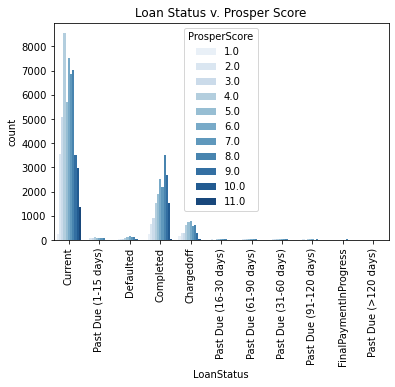

In [29]:
# total count of loan statuses vs prosper score to see if there is a correlation
sb.countplot(data = clean_prosper_df, x = 'LoanStatus', hue = 'ProsperScore', palette = 'Blues').set(title='Loan Status v. Prosper Score')
plt.xticks(rotation=90);

In [30]:
# too busy - taking out unnecessary statuses, such as any past-due and final payment statuses
condition = (clean_prosper_df['LoanStatus'] == 'Completed') | (clean_prosper_df['LoanStatus'] == 'Defaulted') |\
                  (clean_prosper_df['LoanStatus'] == 'Chargedoff')
clean_prosper_df = clean_prosper_df[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
clean_prosper_df['LoanStatus'] = clean_prosper_df.apply(change_to_defaulted, axis=1)
clean_prosper_df['LoanStatus'].value_counts()

Completed    17703
Defaulted     5330
Name: LoanStatus, dtype: int64

**After cleaning the dataset even further, we find there are 17,703 complete loans and 5,330 defaulted loans.**

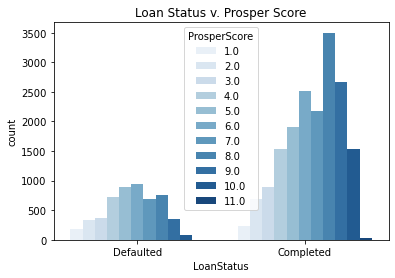

In [31]:
# run the visualization again to make sure cleaning worked and complete observation(s)
sb.countplot(data = clean_prosper_df, x = 'LoanStatus', hue = 'ProsperScore', palette = 'Blues').set(title='Loan Status v. Prosper Score');

#### Observation(s):

 - The most common Prosper Score amongst defaulted loans is 6.0, a little over the median score, which is suprising because a score of 5.0 is labeled as moderately likely to default (1.0 being most likely and 10.0 being least likely, with an outlier of 11.0).
 - The most common Prosper Score amongst completed loans is 8.0, closer to the "least likely to default" score, which is to be expected.

#### 2 - Loan Status v. Monthly Loan Payment Visualization

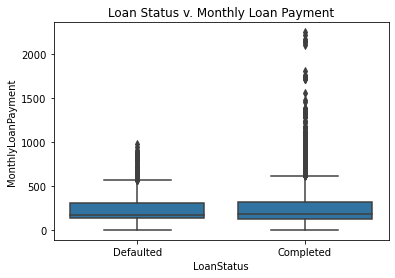

In [32]:
# total count of loan statuses vs monthly loan payment to see if there is a correlation
sb.boxplot(data = clean_prosper_df, x = 'LoanStatus', y = 'MonthlyLoanPayment', color = plot_color).set(title='Loan Status v. Monthly Loan Payment');

#### Observation(s):

 - As shown in the box plot above, the average monthly payment is almost the same between defaulted and completed loans; however, more defaulted loans show monthly payments of 1,000 dollars or less, whereas the completed loans have monthly payments of 2,000+ dollars.

#### 3 - Listing Category v. Loan Status Visualization

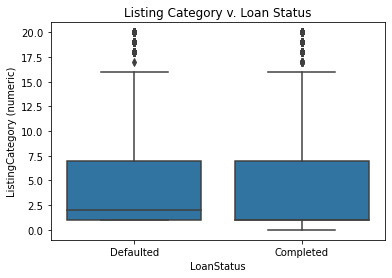

In [33]:
# total count of loan statuses vs listing category to see if there is a correlation
sb.boxplot(data = clean_prosper_df, x = 'LoanStatus', y = 'ListingCategory (numeric)', color = plot_color).set(title='Listing Category v. Loan Status');

**END:** 
> *There is no noted difference between the Loan Status and what the borrow chose as the Listing Category, other than the median chosen listing category.*

#### 4 - Employment Status v. Stated Monthly Income Visualization

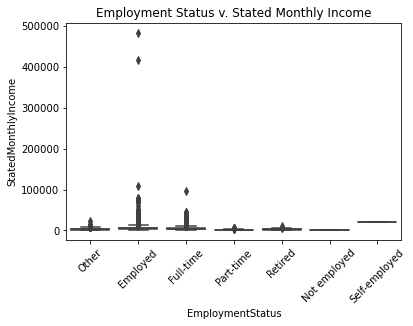

In [34]:
# total count of employment status chosen vs stated monthly income to determine if an employment status chosen
# has any effect on stated monthly income
sb.boxplot(data = clean_prosper_df, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', color = plot_color).set(title='Employment Status v. Stated Monthly Income')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);

#### Observation(s):

 - From the box plot above, we observe that those who chose 'Employed' as their employment status make the most over all other statuses that are available at the time the consumer applies for a loan. Now I will dive deeper in the next visualization to see if Employment Status has any bearing on whether a consumer defaults or completes their loan.

#### 5 - Loan Status v. Employment Status Visualization

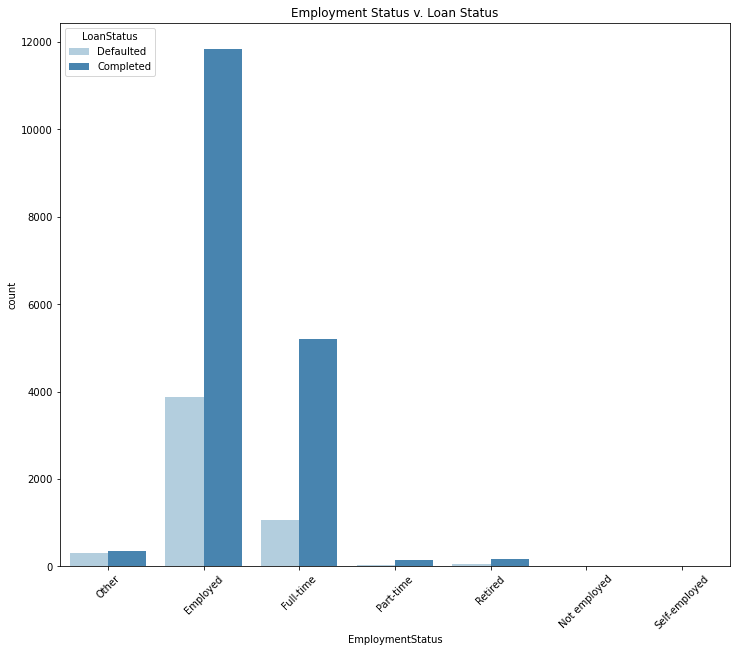

In [35]:
# we saw in the above visual that those who chose 'Employed' as their employment status tend to have higher
# stated monthly income - I will go even further and compare loan status to employment status to see if there is any
# correlation between employment status and whether or not that consumer defaults on their loan
plt.figure(figsize = [12, 10])
sb.countplot(data = clean_prosper_df, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Blues').set(title='Employment Status v. Loan Status')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);

#### Observation(s):

 - From this visualization we can correlate that those who have chosen 'Employed' as their employment status are three times more likely to complete their loan than default. Employed also has the highest number of completed loans over all other employment statuses chosen.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was interesting to see that the most common prosper score amongst defaulted loans was 6.0, which is right around the median score of 5.0, meaning individuals with a prosper score of 6.0 are most likely to default over the other scores, even though the score would indicate that the number of default loans should be much lower. We would expect those with scores 4.0 or less would make up the majority of defaulted loans, which is not the case. Therefor, I would confidentally say that prosper score has no bearing on whether or not an individual will default on a loan. However, in the last visual, we can see that those who have chosen "employed" as their employment status tend to have a higher average of stated monthly income, and have more completed loans over defaulted (they are three times more likely to complete loans than default on them).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes! In the second visual, it was interesting to see that, while the average monthly payment is about the same for both defaulted and completed loans, the defaulted loans have payments of **1,000 dollars or less**, while the completed loans had higher payments, some being **higher than 2,000 dollars**. I did hit one dead-end when I tried to compare listing category and loan status: the box plots were exactly the same when seeing if any loan statuses chosen had higher, or lower, defaults than completions. There were minute differences that I do not think are worth exploring at this time.

## Step IV - Multivariate Exploration

#### 1 -  Monthly Payment v. Prosper Score v. Loan Status Visualization

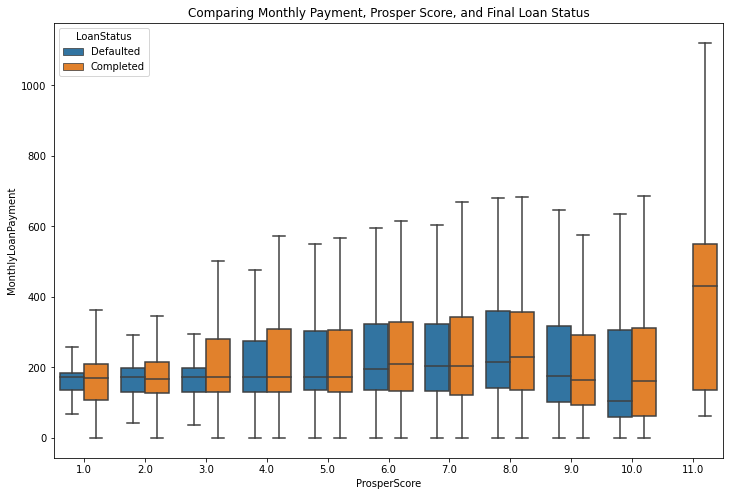

In [41]:
# comparing prosper score and monthly payment vs. final loan status to determine what (if any) factors go in to the
# approval/denial decision when the consumer applies for a loan - removed outliers
plt.figure(figsize = [12, 8])
sb.boxplot(data=clean_prosper_df, x='ProsperScore', y='MonthlyLoanPayment', hue='LoanStatus', showfliers = False).set(title='Comparing Monthly Payment, Prosper Score, and Final Loan Status');

#### Observation(s):

 - Other than those with a prosper score of 9.0, most consumers (regardless of score) were able to complete their loan and avoid going in to default status. The prosper score 11.0 is an outlier, but it is good to see that this is the only score with no defaults; and this is good because 10.0 is the highest (least risk of default) score that the data gives us.
 - It is interesting to see that, even when the consumer has a score of 9.0 (high confidence of low risk), if their payment is 1,000 dollars or less, they have a higher risk of defaulting than their peers with higher monthly loan payments.
 - We would expect to see more defaulted loans in consumers with lower prosper scores (5.0 or lower), but it seems that those with scores above the median (5.0) are at a higher risk of default. This is opposite of what Prosper intended when implementing this rating system.

#### 2 -  Stated Monthly Income v. Prosper Score v. Loan Status Visualization

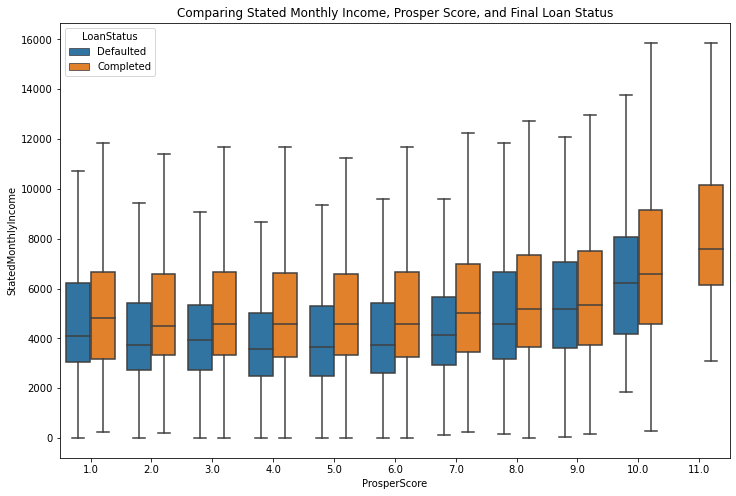

In [63]:
# comparing prosper score and monthly payment vs. final loan status to determine what (if any) factors go in to the
# approval/denial decision when the consumer applies for a loan - removed outliers
plt.figure(figsize = [12, 8])
sb.boxplot(data=clean_prosper_df, x='ProsperScore', y='StatedMonthlyIncome', hue='LoanStatus', showfliers=False).set(title='Comparing Stated Monthly Income, Prosper Score, and Final Loan Status');

#### Observation(s):

 - It is interesting to see that the Prosper scoring system is not very accurate, according to the last two visuals. The only one that truly makes sense is the outlier score 11.0 as this should indicate that there is close to 0/no risk for these individuals, therefor we would want to see little-to-no defaulted loan status (which we do).
 - Compared to visual 1 (in multivariate), we can see a slight upward trend in that the higher a consumers' stated monthly income is, the more likely they will complete their loan instead of defaulting.
 - Although, across the board on this visual compared to the previous one, more loans were completed no matter what prosper score was given, it does show a correlation between stated monthly income and loan status (ie: no matter the score, if a consumer stated lower monthly income on their application, they have a higher risk of defaulting on the loan.
 - There is a bigger gap between median stated monthly income from score 1.0 - 7.0: we see from score 8.0 - 10.0 the median income gap starts to get smaller, almost the same for score 9.0.

#### 3 -  Term v. Stated Monthly Income v. Loan Status v. Employment Status Visualization

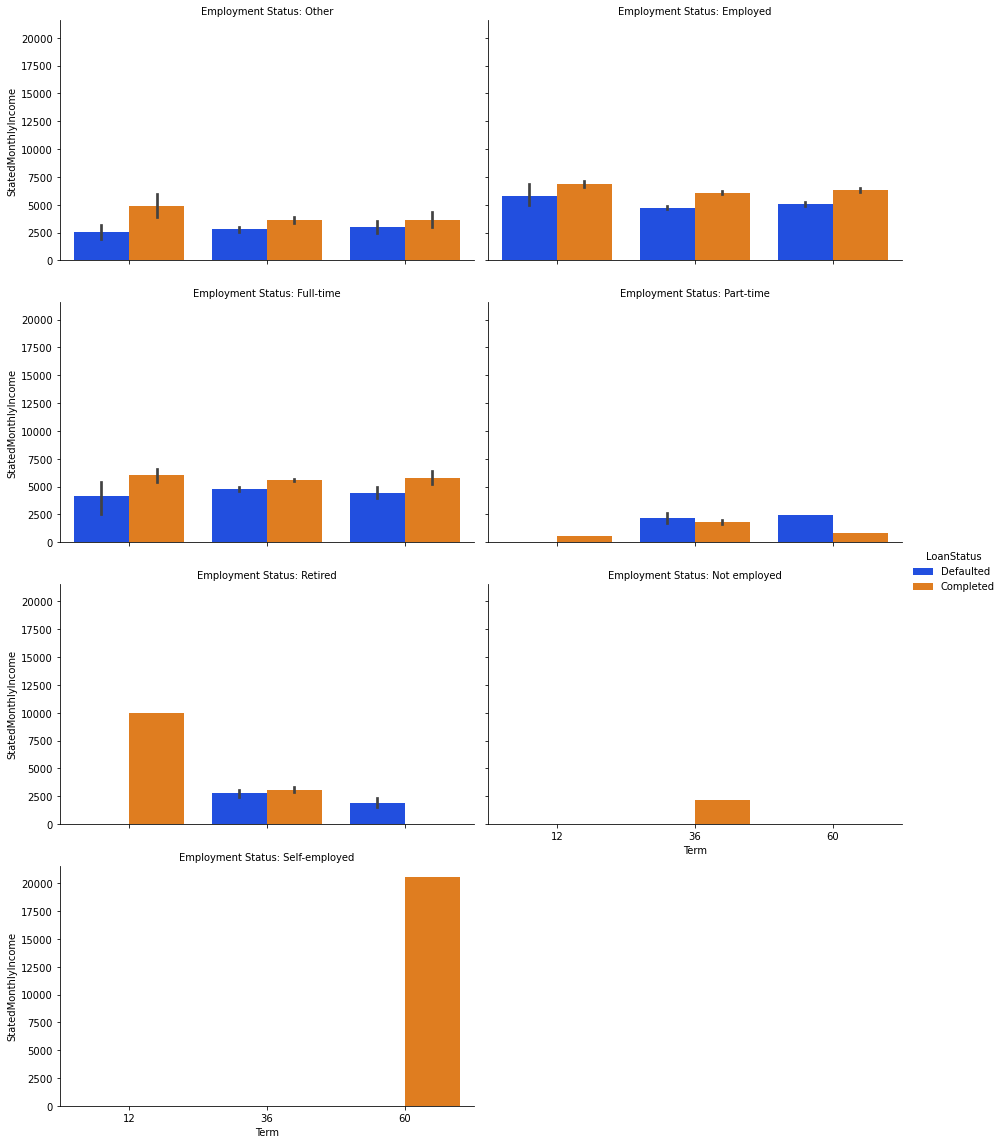

In [70]:
g = sb.catplot(
        x='Term', 
        y='StatedMonthlyIncome', 
        data=clean_prosper_df,
        palette='bright',
        height=4, aspect=1.6,
        kind='bar',
        hue='LoanStatus', 
        col ='EmploymentStatus',
        col_wrap=2)

g.set_titles(
    'Employment Status: {col_name}');

#### Observation(s):

 - Loan term (in months) does not seem to have any bearing on whether or not the consumer will default on their loan, all it shows is that those that are self-employed and not employeed took longer loan terms than consumers with different employment statuses.
 - However, if we look at Employment Status: Part Time, this chart shows that this was the only employment status that defaulted on their loan more than they completed it (regardless of stated monthly income).
 - Going back to the first observation: self-employed and not employeed were the only employment statuses here that had ZERO defaulted loans!
 - Retired employment status does show that those with a shorter loan term were less likely to default, while those with a longer loan term were more likely to default.
 - The statuses other, employed, and full time seem to have an equal distribution of both completed and defaulted loans.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It seems as if the monthly loan payment has little-to-no bearing on whether an individual will default, or complete, their loan; even when I included the prosper score as the x-axis variable. However, the stated monthly income does have an impact on whether or not a consumer will default on their loan, per the visuals shown. The second visual shows an upward trend that indicates the scoring system does work a little when compared to stated monthly income, but nothing else. 

### Were there any interesting or surprising interactions between features?

> It was surprising to see that both self-employed and not employed consumers had NO defaulted loans, only completed! The correlation between loan term(s) and whether or not retired consumers would complete or default their loans was surpising as well.

## Conclusions

> My initial thought that most consumers applied for loans through Prosper because of debt was correct as 'Debt Consolidation' was the highest chosen listing category, even though the average Debt to Income Ratio was between 10% - 20%, which I don't believe to be too high. It was pleasently surprising, however, to see that the majority of loans in the dataset were labeled as 'current'! 

> I would have loved to dive deeper into each column/variable to see if there are any correlations between Borrower State and Loan Status, but I do not think it aligns with the course I chose to take.

> My conclusion is that the Prosper Score system needs an overhaul as it seems to be accurate with certain variables, and not accurate with others. There needs to be a better, more complete, scoring system in place to be fair to consumers as to whether their applications are approved or denied based on more than a handful of variables. One way to do this would be to compare DTI to more than just one or two other variables, maybe a complete comparison of every variable/column listed before I cleaned it up to only include 13.

Some code has been adapted from:

> https://github.com/Abhishek20182/Communicate-Data-Findings/blob/master/exploration.ipynb